In [1]:
%matplotlib inline
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# File to Load (Remember to change these)
city_data_to_load = "data/city_data.csv"
ride_data_to_load = "data/ride_data.csv"

In [2]:
# Read the City and Ride Data
city_df = pd.read_csv(city_data_to_load)
ride_df = pd.read_csv(ride_data_to_load)

In [3]:
# Combine the data into a single dataset
# We are using a left merge to merge city_df into the ride_df
pyber_df = pd.merge(ride_df, city_df, on="city", how="left")

In [4]:
# Display the data table for preview
pyber_df.head()

,city,date,fare,ride_id,driver_count,type
0,Lake Jonathanshire,2018-01-14 10:14:22,13.83,5739410935873,5,Urban
1,South Michelleport,2018-03-04 18:24:09,30.24,2343912425577,72,Urban
2,Port Samanthamouth,2018-02-24 04:29:00,33.44,2005065760003,57,Urban
3,Rodneyfort,2018-02-10 23:22:03,23.44,5149245426178,34,Urban
4,South Jack,2018-03-06 04:28:35,34.58,3908451377344,46,Urban


## Bubble Plot of Ride Sharing Data

In [5]:
# build scatter plot for rural city type
# Use .loc to isolate the city type column by Rural areas
# Group the Rural areas by city
rural_df = pyber_df.loc[pyber_df["type"] == "Rural"]
rural_city_group = rural_df.groupby("city")
rural_city_group

In [6]:
# x-axis = count of ride_id by rural cities
# y-axis = average fares by rural cities
# s = driver count per city in the rural type
rural_rides_count = rural_city_group["ride_id"].count()
rural_rides_avg_fares = rural_city_group["fare"].mean()
rural_driver_count = rural_city_group["driver_count"].sum()

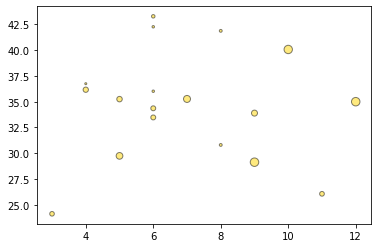

In [7]:
# plot the rural_city_group to see how it looks
plt.scatter(x=rural_rides_count,
            y=rural_rides_avg_fares,
            s=rural_driver_count * 1,
            facecolors="gold",
            edgecolors="black",
            alpha=0.5)

In [8]:
# build scatter plot for suburban city type
# Use .loc to isolate the city type column by suburban areas
# Group the suburban areas by city
suburban_df = pyber_df.loc[pyber_df["type"] == "Suburban"]
suburban_city_group = suburban_df.groupby("city")
suburban_city_group

In [9]:
# x-axis = count of ride_id by suburban cities
# y-axis = average fares by suburban cities
# s = driver count per city in the suburban type
suburban_rides_count = suburban_city_group["ride_id"].count()
suburban_rides_avg_fares = suburban_city_group["fare"].mean()
suburban_driver_count = suburban_city_group["driver_count"].sum()

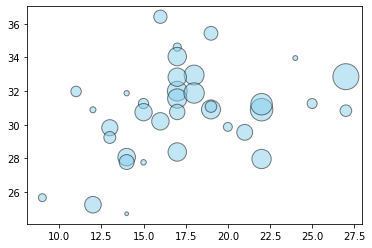

In [10]:
# plot the suburban_city_group to see how it looks
plt.scatter(x=suburban_rides_count,
            y=suburban_rides_avg_fares,
            s=suburban_driver_count * 1,
            facecolors="skyblue",
            edgecolors="black",
            alpha=0.5)

In [11]:
# build scatter plot for urban city type
# Use .loc to isolate the city type column by urban areas
# Group the urban areas by city
urban_df = pyber_df.loc[pyber_df["type"] == "Urban"]
urban_city_group = urban_df.groupby("city")
urban_city_group

In [12]:
# x-axis = count of ride_id by urban cities
# y-axis = average fares by urban cities
# s = driver count per city in the urban type
urban_rides_count = urban_city_group["ride_id"].count()
urban_rides_avg_fares = urban_city_group["fare"].mean()
urban_driver_count = urban_city_group["driver_count"].sum()

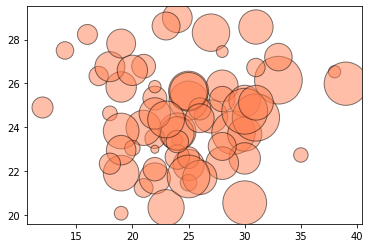

In [13]:
# plot the urban_city_group to see how it looks
plt.scatter(x=urban_rides_count,
            y=urban_rides_avg_fares,
            s=urban_driver_count * 1,
            facecolors="coral",
            edgecolors="black",
            alpha=0.5)

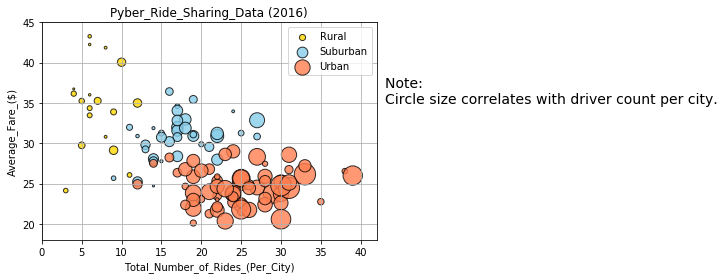

In [14]:
# Combine all three city types and create bubble plot
# size the bubble plot so that the urban and suburban ones aren't ridiculously large
# darken the bubbles to make it look like the example
plt.scatter(x=rural_rides_count,
            y=rural_rides_avg_fares,
            s=rural_driver_count,
            label = "Rural",
            facecolors="gold",
            edgecolors="black",
            alpha=0.8)
plt.scatter(x=suburban_rides_count,
            y=suburban_rides_avg_fares,
            s=suburban_driver_count/3,
            label = "Suburban",
            facecolors="skyblue",
            edgecolors="black",
            alpha=0.8)
plt.scatter(x=urban_rides_count,
            y=urban_rides_avg_fares,
            s=urban_driver_count /5,
            label = "Urban",
            facecolors="coral",
            edgecolors="black",
            alpha=0.8)

# Incorporate the other graph properties
# Naming the X and Y axis (don't use spaces in title)
# Give the Bubble Plot a title
# Add Grid
# Add Legend
plt.xlabel("Total_Number_of_Rides_(Per_City)")
plt.ylabel("Average_Fare_($)")
plt.title("Pyber_Ride_Sharing_Data (2016)")
plt.grid()
plt.legend(loc="best")

# Add note (\n creates a new line)
plt.text(43, 35, 'Note: \nCircle size correlates with driver count per city.', dict(size=14))

# Set the upper and lower limits of our x axis
plt.xlim(0,42)

# Set the upper and lower limits of our y axis
plt.ylim(18,45)

# Save Figure
plt.savefig("../Images/Pyber_Ride_Sharing_Data_Bubble_Plot.png")

# Show plot
plt.show()

## Total Fares by City Type

In [15]:
# Calculate Type Percents
city_type_breakdown = pyber_df.groupby('type').fare.sum()
city_type_breakdown

type
Rural        4327.93
Suburban    19356.33
Urban       39854.38
Name: fare, dtype: float64

In [16]:
# Build Pie Chart based on city types
city_type = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [city_type_breakdown[0], city_type_breakdown[1], city_type_breakdown[2]]

# the colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0., 0, 0.1)

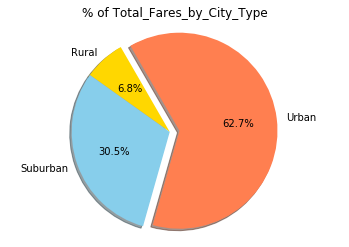

In [17]:
# Create the actual pie chart
# Shadow=bool is to add a slight shadow underneath the pie
plt.pie(sizes, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=bool, startangle=120)

# Title
plt.title("% of Total_Fares_by_City_Type")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Total_Fares_By_City.png")

# Show Figure
plt.show()

## Total Rides by City Type

In [18]:
# Calculate Ride Percents
rides_by_city = pyber_df.groupby('type').ride_id.count()
rides_by_city

type
Rural        125
Suburban     625
Urban       1625
Name: ride_id, dtype: int64

In [19]:
# Build Pie Chart based on city types
city_type = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [rides_by_city[0], rides_by_city[1], rides_by_city[2]]

# the colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0., 0, 0.1)


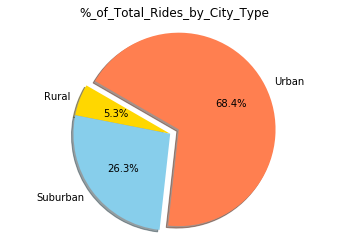

In [20]:
# Create the actual pie chart
# Shadow=bool is to add a slight shadow underneath the pie
plt.pie(sizes, explode=explode, labels=city_type, colors=colors,
        autopct="%1.1f%%", shadow=bool, startangle=150)

# Title
plt.title("%_of_Total_Rides_by_City_Type")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Total_Rides_By_City_Type.png")

# Show Figure
plt.show()

## Total Drivers by City Type

In [21]:
# Calculate Driver Percents
total_drivers_type = city_df.groupby('type').driver_count.sum()
total_drivers_type

type
Rural         78
Suburban     490
Urban       2405
Name: driver_count, dtype: int64

In [22]:
# Build Pie Chart based on city types
total_drivers = ["Rural", "Suburban", "Urban"]

# The values of each section of the pie chart
sizes = [total_drivers_type[0], total_drivers_type[1], total_drivers_type[2]]

# the colors of each section of the pie chart
colors = ["gold", "skyblue", "coral"]

# Tells matplotlib to seperate the "Python" section from the others
explode = (0., 0, 0.1)

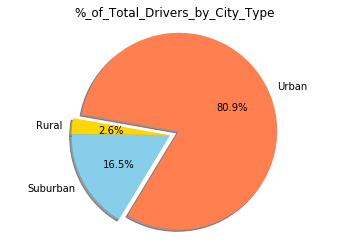

In [23]:
# Create the actual pie chart
# Shadow=bool is to add a slight shadow underneath the pie
plt.pie(sizes, explode=explode, labels=total_drivers, colors=colors,
        autopct="%1.1f%%", shadow=bool, startangle=170)

# Title
plt.title("%_of_Total_Drivers_by_City_Type")

# Tells matplotlib that we want a pie chart with equal axes
plt.axis("equal")

# Save Figure
plt.savefig("../Images/Total_Rides_By_City_Type.png")

# Show Figure
plt.show()